# Análisis Exploratorio de Datos
El siguiente informe muestra el comportamiento de las variables seleccionadas del conjunto de datos *Predict students dropout and academic success* para modelar el comportamiento de el éxito o deserción universitaria a través de una red bayesiana. Con los resultados encontrados cualquier universidad podrá contar con un modelo predictivo con el fin de generar estrategias que le permitan disminuir y prevenir de manera proactiva la deserción. 

Para la lectura y manipulación de los datos se utilizó la librería pandas.

In [102]:
#Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [88]:
#Lectura de los datos
df = pd.read_csv('data.csv', sep=';')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df
#Filtrar/eliminar las filas que contienen Enrolled
#df = df.loc[df["Target"].isin(["Dropout","Graduate"])]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## 1. Reconocimiento de la información del data frame
Para iniciar es clave identificar el tamaño y las dimensiones del conjunto de datos con la función shape. Posterior a esto se revisaron las columnas de la tabla con el atributo columns del objeto df.

In [30]:
#Tamaño del data frame
df.size

163688

In [31]:
#Dimensiones del conjunto de datos
df.shape

(4424, 37)

In [131]:
#Columnas del Data Frame
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

## 2. Análisis por columna

In [145]:
d = {}

for i in df.columns:
    # Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
    contingency_table = pd.crosstab(df['Target'], df[i])
    # Calcula el estadístico chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    # Calcula la V de Cramér
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
    cramers_v = np.sqrt(chi2 / (n * min_dim))

    d[i] = cramers_v
    
d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

for i in d:
    print(i,": ", d[i] ,"\n")

Target :  1.0 

Curricular units 2nd sem (grade) :  0.5735255595685889 

Curricular units 2nd sem (approved) :  0.5452651746391657 

Curricular units 1st sem (grade) :  0.533717685236556 

Curricular units 1st sem (approved) :  0.4815560188603704 

Tuition fees up to date :  0.4314576214556677 

Admission grade :  0.402931151752793 

Curricular units 2nd sem (evaluations) :  0.31330511330623634 

Scholarship holder :  0.30440670047871277 

Curricular units 1st sem (evaluations) :  0.30298447300494535 

Course :  0.25119166123978515 

Age at enrollment :  0.24870083521583244 

Previous qualification (grade) :  0.24492923220603466 

Debtor :  0.2421148997779127 

Gender :  0.2296246802568394 

Application mode :  0.22961995958282255 

Curricular units 2nd sem (enrolled) :  0.2188914177543015 

Curricular units 1st sem (enrolled) :  0.21528317747789089 

Mother's occupation :  0.18163964157993834 

Father's occupation :  0.17289807428376638 

Father's qualification :  0.1594664984039091 


In [33]:
# Cantidad de valores no nulos en el dataframe y tipo de variables
df.info(memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [34]:
#Valores distintos por columna
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

# 3. Diagramas de cajas

## 3.1 Target vs Previous qualification (grade)

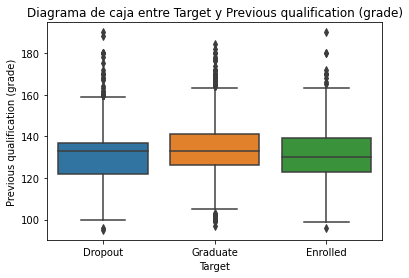

In [77]:
sns.boxplot(x='Target', y='Previous qualification (grade)', data=df)
plt.title("Diagrama de caja entre Target y Previous qualification (grade)")
plt.show()

## 3.2 Target vs Admission grade

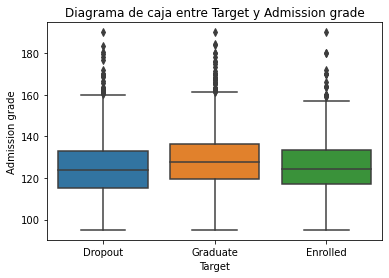

In [79]:
sns.boxplot(x='Target', y='Admission grade', data=df)
plt.title("Diagrama de caja entre Target y Admission grade")
plt.show()

## 3.3 Target vs Curricular units 1st sem (grade)

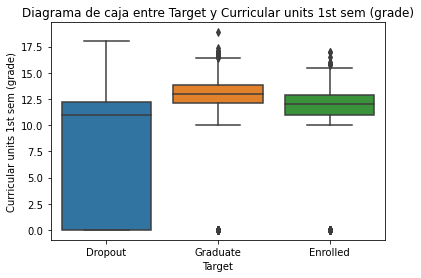

In [80]:
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=df)
plt.title("Diagrama de caja entre Target y Curricular units 1st sem (grade)")
plt.show()

## 3.4 Target vs Curricular units 2nd sem (grade)

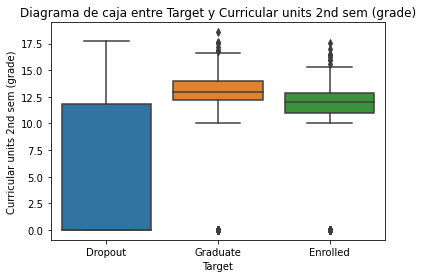

In [83]:
sns.boxplot(x='Target', y='Curricular units 2nd sem (grade)', data=df)
plt.title("Diagrama de caja entre Target y Curricular units 2nd sem (grade)")
plt.show()

## 3.5 Target vs Unemployment rate

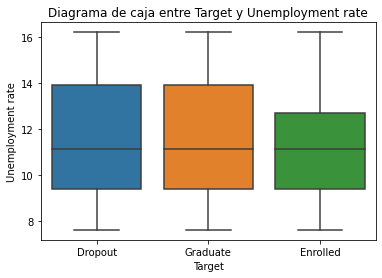

In [84]:
sns.boxplot(x='Target', y='Unemployment rate', data=df)
plt.title("Diagrama de caja entre Target y Unemployment rate")
plt.show()

## 3.5 Target vs Inflation rate

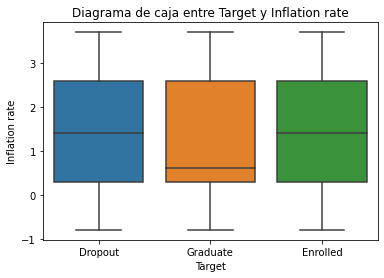

In [85]:
sns.boxplot(x='Target', y='Inflation rate', data=df)
plt.title("Diagrama de caja entre Target y Inflation rate")
plt.show()

## 3.5 Target vs GDP

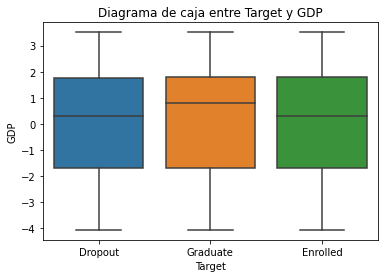

In [86]:
sns.boxplot(x='Target', y='GDP', data=df)
plt.title("Diagrama de caja entre Target y GDP")
plt.show()

## 3.6 Target Vs Otra

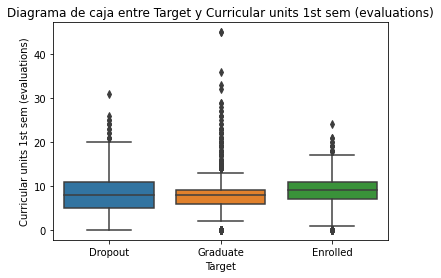

In [92]:
sns.boxplot(x='Target', y='Curricular units 1st sem (evaluations)', data=df)
plt.title("Diagrama de caja entre Target y Curricular units 1st sem (evaluations)")
plt.show()

# 3. Selección de datos de interés

Considerando los posibles intereses del cliente final y lo encontrado en la literatura, se hizo una primera selección de variables:

1. Course
2. Daytime/evening attendance
3. Previous qualification (grade)
4. Mother's qualification
5. Father's qualification
6. Admission grade
7. Displaced
8. Tuition fees up to date
9. Scholarship holder
10. Curricular units 1st sem (evaluations)
11. Curricular units 1st sem (grade)
12. Curricular units 2nd sem (evaluations)
13. Curricular units 2nd sem (grade)
14. Unemployment rate
15. Inflation rate
16. GDP
17. Target

In [35]:
#Visualización rápida para el reconocimiento de los datos utilizando la función head
df_new = df[["Course", "Daytime/evening attendance\t", "Previous qualification (grade)", "Mother's qualification", "Father's qualification", "Admission grade", "Displaced", "Tuition fees up to date", "Scholarship holder", "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP", "Target"]]
df_new.head(10)

,Course,Daytime/evening attendance\t,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Displaced,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,171,1,122.0,19,12,127.3,1,1,0,0,0.000000,0,0.000000,10.8,1.4,1.74,Dropout
1,9254,1,160.0,1,3,142.5,1,0,0,6,14.000000,6,13.666667,13.9,-0.3,0.79,Graduate
2,9070,1,122.0,37,37,124.8,1,0,0,0,0.000000,0,0.000000,10.8,1.4,1.74,Dropout
3,9773,1,122.0,38,37,119.6,1,1,0,8,13.428571,10,12.400000,9.4,-0.8,-3.12,Graduate
4,8014,0,100.0,37,38,141.5,0,1,0,9,12.333333,6,13.000000,13.9,-0.3,0.79,Graduate
5,9991,0,133.1,37,37,114.8,0,1,0,10,11.857143,17,11.500000,16.2,0.3,-0.92,Graduate
6,9500,1,142.0,19,38,128.4,1,1,1,9,13.300000,8,14.345000,15.5,2.8,-4.06,Graduate
7,9254,1,119.0,37,37,113.1,1,0,0,5,0.000000,5,0.000000,15.5,2.8,-4.06,Dropout
8,9238,1,137.0,1,1,129.3,0,1,1,8,13.875000,7,14.142857,16.2,0.3,-0.92,Graduate
9,9238,1,138.0,1,19,123.0,1,0,0,9,11.400000,14,13.500000,8.9,1.4,3.51,Dropout


In [36]:
#Transformar variables categóricas
variables_categoricas = ["Course", "Daytime/evening attendance\t", "Mother's qualification", "Father's qualification", "Displaced", "Tuition fees up to date", "Scholarship holder", "Target"]
df_new[variables_categoricas] = df_new[variables_categoricas].astype('category')

C:\Users\jgvm\AppData\Local\Temp\ipykernel_14636\1398112970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[variables_categoricas] = df_new[variables_categoricas].astype('category')


## 3.1 Filtro adicional de variables continuas

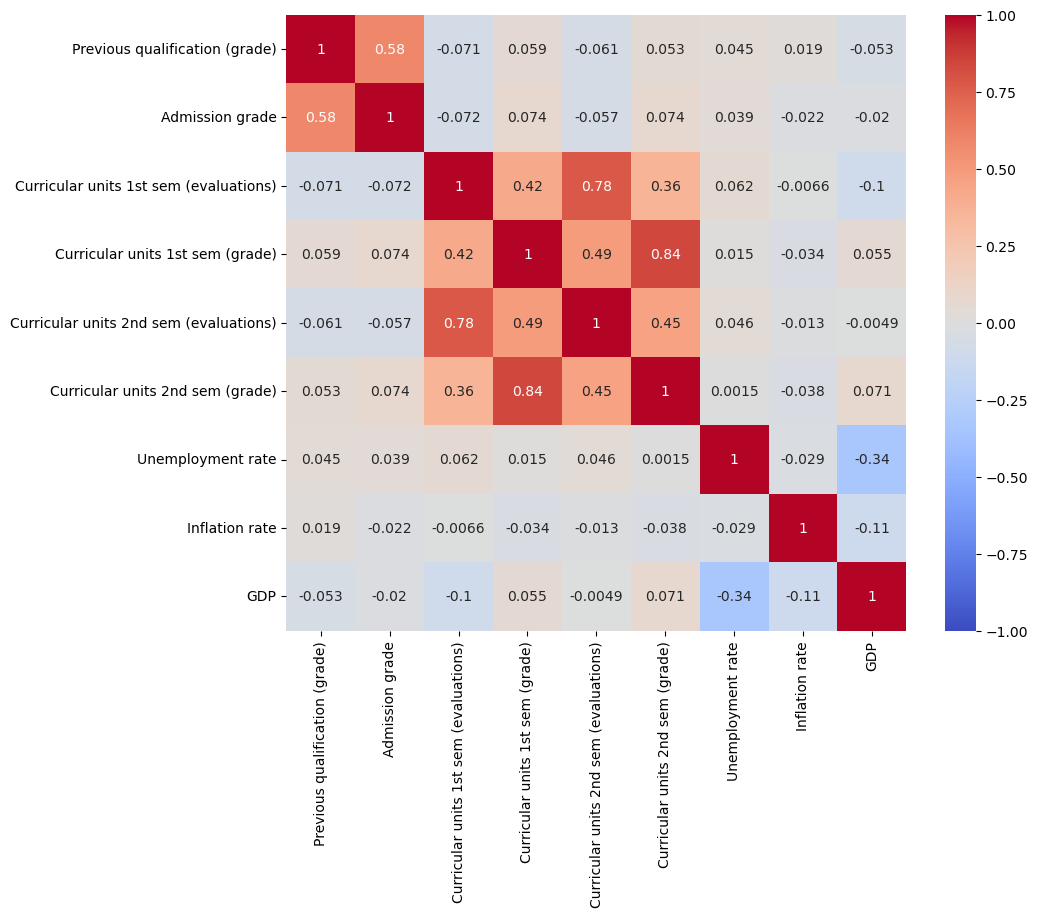

In [37]:
df_continuas = df[["Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP"]]
correlation_matrix = df_continuas.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Como se puede observar en la figura anterior, exiten variables dentro del modelo actual que están bastante correlacionadas pues su valor está por encima de 0.5. Por lo tanto, debido a esta alta relación y simulitud que existe entre ellas se procederá a eliminar una de las variables dentro del par correlacionado. 

Entonces, se identificó una correlación de **0.58** entre las variables _Previous qualification (grade)_ y _Admission grade_, una correlación de **0.78** entre las variables _Curricular units 1st sem (evaluations)_ y _Curricular units 2nd sem (evaluations)_, por último, una correlación de **0.84** entre las variables _Curricular units 1st sem (grade)_ y _Curricular units 2nd sem (grade)_.

Una vez identificadas las variables con alta correlación se procede a retirar una de ellas dentro del par de variables. Según lo anterior, se dio prioridad a las variables que pueden brindar información de forma temprana según las necesidades del cliente que, en este caso, es la universidad. En este orden de ideas, se decidió dejar dentro de modelo las variables  _Previous qualification (grade)_,  _Curricular units 1st sem (evaluations)_ y _Curricular units 1st sem (grade)_ y sacar del modelo las variables _Admission grade_, Curricular units 2nd sem (evaluations)_ y _Curricular units 2nd sem (grade)_. Con estas variables dentro del modelo se pretende tomar información desde una fase temprana del estudiantes pues al obtener la información del primer semestre se podrá inferir de una vez sin necesidad de que el estudiante complete el segundo segundo semestre ya que ambas variables están altamente correlacionadas.



In [38]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df['Target'], df['Mother\'s qualification'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df['Target'], df['Mother\'s qualification'], normalize='columns') * 100
normalized_by_column


Mother's qualification,1,2,3,4,5,6,9,10,11,12,...,35,36,37,38,39,40,41,42,43,44
Target,,,,,,,,,,,,,,,,,,,,,
Dropout,28.063611,24.096386,31.735160,16.326531,38.095238,75.0,62.5,66.666667,66.666667,52.380952,...,66.666667,66.666667,37.958375,24.911032,50.0,33.333333,33.333333,50.0,25.0,100.0
Enrolled,19.083255,27.710843,23.059361,30.612245,23.809524,0.0,0.0,0.000000,0.000000,7.142857,...,0.000000,0.000000,16.749257,16.192171,25.0,11.111111,0.000000,0.0,25.0,0.0
Graduate,52.853134,48.192771,45.205479,53.061224,38.095238,25.0,37.5,33.333333,33.333333,40.476190,...,33.333333,33.333333,45.292369,58.896797,25.0,55.555556,66.666667,50.0,50.0,0.0


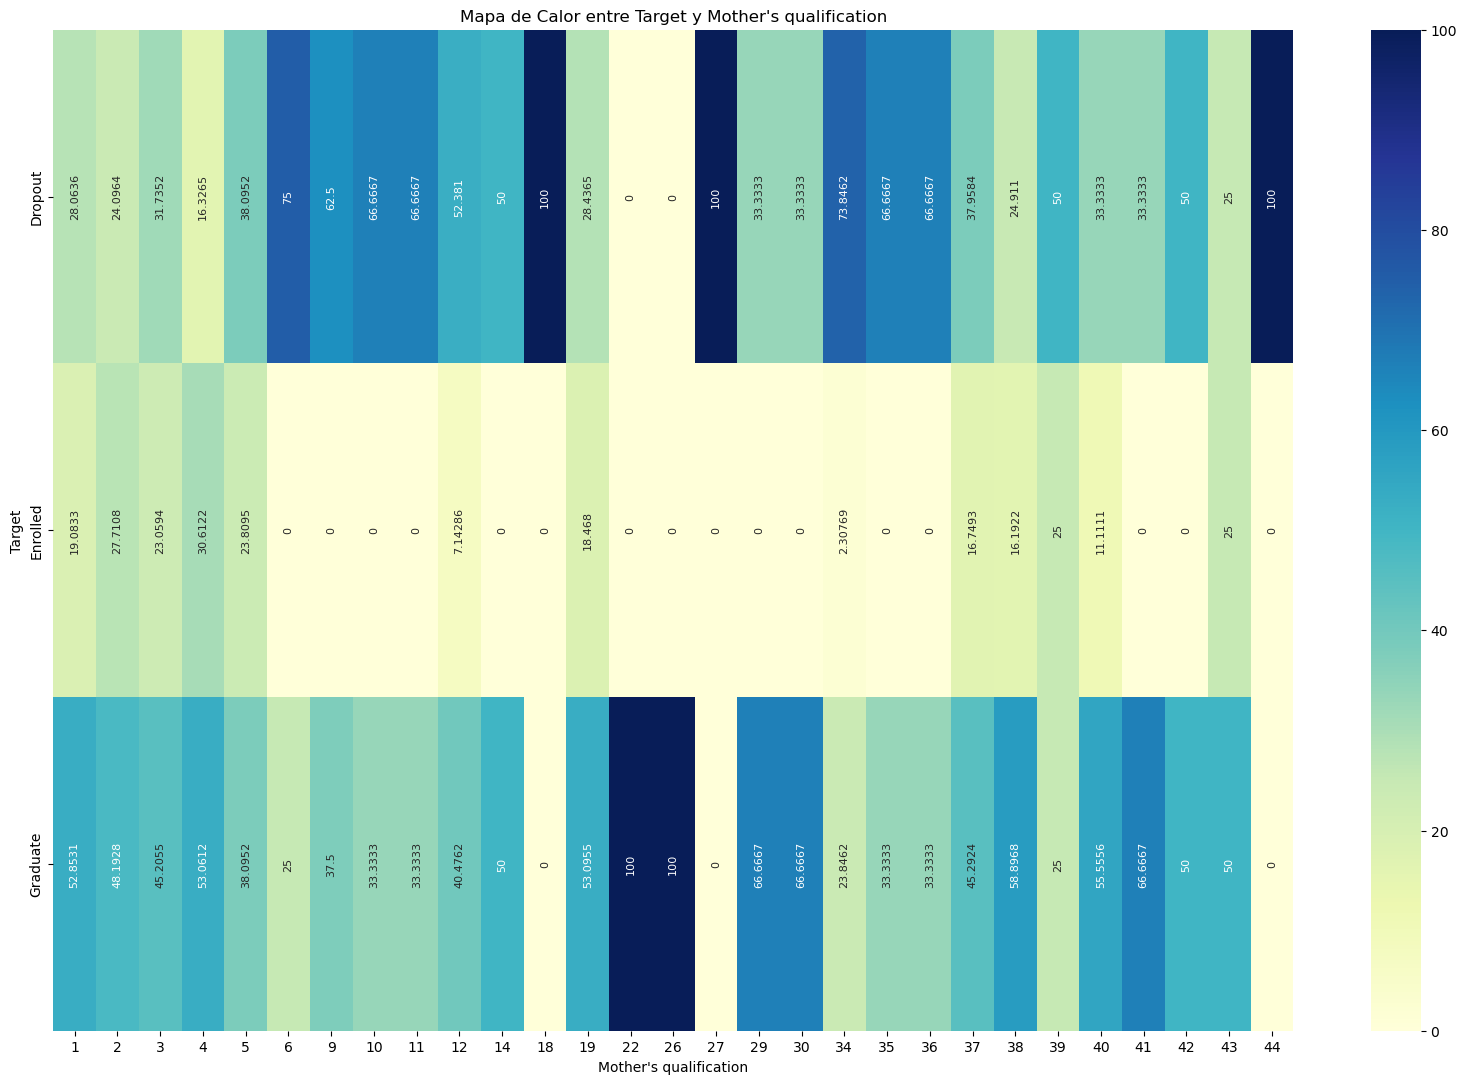

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 13))
ax = sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"rotation": 90, "size": 8})
plt.title("Mapa de Calor entre Target y Mother's qualification")
plt.show()

In [40]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df['Target'], df['Mother\'s qualification'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)


0.15694880104029407


In [41]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df['Target'], df['Father\'s qualification'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df['Target'], df['Father\'s qualification'], normalize='columns') * 100
normalized_by_column

Father's qualification,1,2,3,4,5,6,9,10,11,12,...,35,36,37,38,39,40,41,42,43,44
Target,,,,,,,,,,,,,,,,,,,,,
Dropout,31.084071,32.352941,31.914894,35.897436,55.555556,100.0,20.0,100.0,40.0,36.842105,...,100.0,62.5,35.732010,23.789174,40.0,60.0,50.0,0.0,0.0,100.0
Enrolled,19.026549,36.764706,21.985816,17.948718,16.666667,0.0,0.0,0.0,0.0,10.526316,...,0.0,0.0,16.459884,18.091168,35.0,0.0,50.0,0.0,0.0,0.0
Graduate,49.889381,30.882353,46.099291,46.153846,27.777778,0.0,80.0,0.0,60.0,52.631579,...,0.0,37.5,47.808106,58.119658,25.0,40.0,0.0,100.0,100.0,0.0


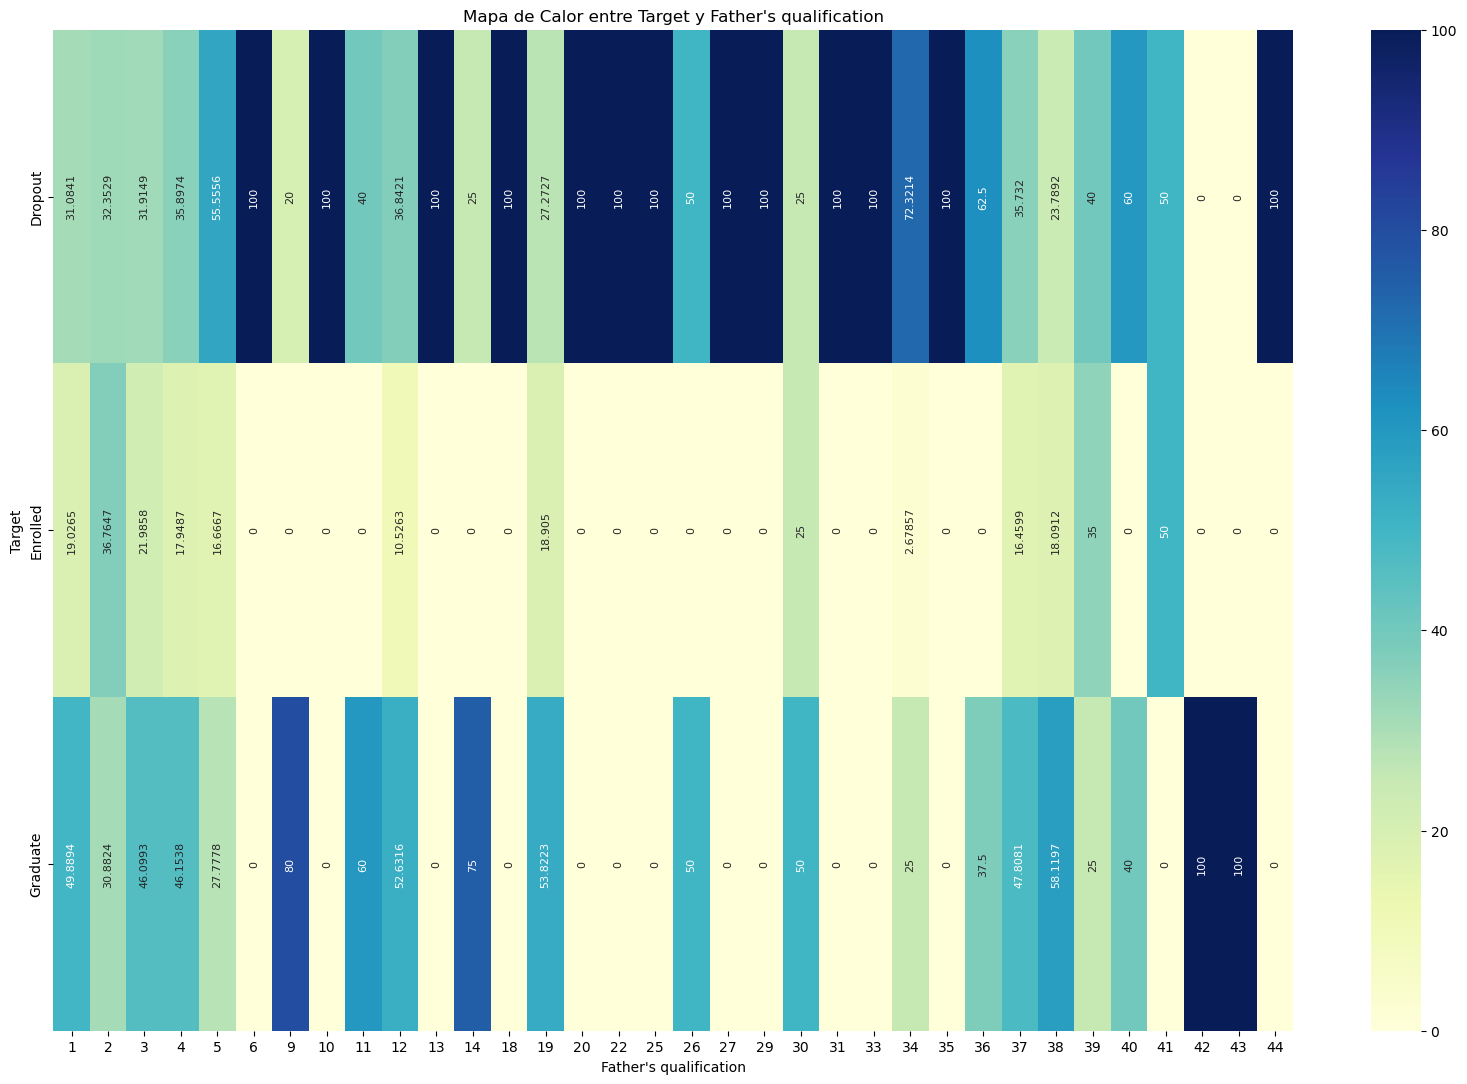

In [42]:
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"rotation": 90, "size": 8})
plt.title("Mapa de Calor entre Target y Father's qualification")
plt.show()

In [43]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df['Target'], df['Father\'s qualification'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.1594664984039091


## 3.2 Variables finales


1. Course
2. Daytime/evening attendance
3. Previous qualification (grade)
4. Displaced
5. Tuition fees up to date
6. Scholarship holder
7. Curricular units 1st sem (evaluations)
8. Curricular units 1st sem (grade)
9. Unemployment rate
10. Inflation rate
11. GDP
12. Target


## 3.3 Modelo Final

In [44]:
# Nuevo Modelo
df_final = df_new[["Course", "Daytime/evening attendance\t", "Previous qualification (grade)", "Displaced", "Tuition fees up to date", "Scholarship holder", "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (grade)", "Unemployment rate", "Inflation rate", "GDP", "Target"]]
df_final.head(10)


,Course,Daytime/evening attendance\t,Previous qualification (grade),Displaced,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,171,1,122.0,1,1,0,0,0.000000,10.8,1.4,1.74,Dropout
1,9254,1,160.0,1,0,0,6,14.000000,13.9,-0.3,0.79,Graduate
2,9070,1,122.0,1,0,0,0,0.000000,10.8,1.4,1.74,Dropout
3,9773,1,122.0,1,1,0,8,13.428571,9.4,-0.8,-3.12,Graduate
4,8014,0,100.0,0,1,0,9,12.333333,13.9,-0.3,0.79,Graduate
5,9991,0,133.1,0,1,0,10,11.857143,16.2,0.3,-0.92,Graduate
6,9500,1,142.0,1,1,1,9,13.300000,15.5,2.8,-4.06,Graduate
7,9254,1,119.0,1,0,0,5,0.000000,15.5,2.8,-4.06,Dropout
8,9238,1,137.0,0,1,1,8,13.875000,16.2,0.3,-0.92,Graduate
9,9238,1,138.0,1,0,0,9,11.400000,8.9,1.4,3.51,Dropout


# 4. Discretización 

## 4.1 Variables Continuas

In [45]:
#Descripción de variables continuas
df_final.describe()

,Previous qualification (grade),Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,8.299051,10.640822,11.566139,1.228029,0.001969
std,13.188332,4.179106,4.843663,2.663850,1.382711,2.269935
min,95.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,6.000000,11.000000,9.400000,0.300000,-1.700000
50%,133.100000,8.000000,12.285714,11.100000,1.400000,0.320000
75%,140.000000,10.000000,13.400000,13.900000,2.600000,1.790000
max,190.000000,45.000000,18.875000,16.200000,3.700000,3.510000


### 4.1.1 Curricular units 1st sem (evaluations)

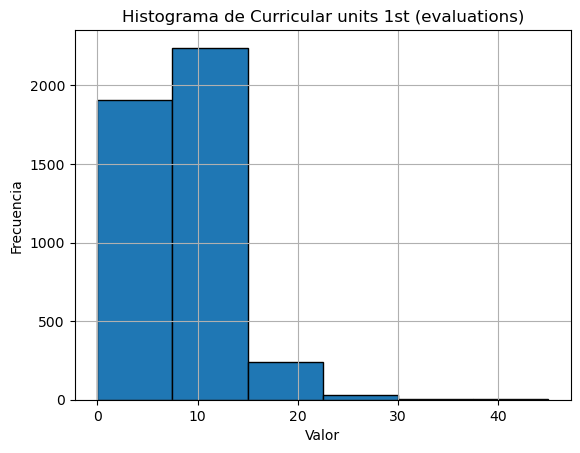

In [46]:
# Crear un histograma para columna_A
frecuencia, bins, p = plt.hist(df_final["Curricular units 1st sem (evaluations)"], bins = 6, edgecolor='black')  # Ajusta el número en 'bins' según cómo quieras los intervalos
plt.title('Histograma de Curricular units 1st (evaluations)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [47]:
frecuencia

array([1.909e+03, 2.240e+03, 2.420e+02, 2.700e+01, 4.000e+00, 2.000e+00])

In [48]:
bins

array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. ])

Se pueden tomar 6 clases para la variable _Curricular units 1st sem (evaluations)_ y definirlas de la siguiente forma:

* (0 , 7.5) -> Muy Bajo (MB)
* (7.5 , 15) -> Bajo (B)
* (15 , 22.5) -> Intermedio Bajo (IB)
* (22.5 , 30) -> Intermadio Alto (IA)
* (30 , 37.5) -> Alto (A)
* (37.5 , 45) -> Muy Alto (MA)

En nuestro curso se realizan minimo 15 talleres y 3 proyectos, con lo cual, son 18 evaluaciones que se realizan dentro del curso. (SE TOMA COMO REFERENCIA)

In [49]:
#Se crea la lista con las clases de la nueva variable discretizada
labels = ['Medio Bajo', 'Bajo', 'Intermedio Bajo', 'Intermedio Alto', 'Alto', 'Muy Alto']

#Se crea una nueva columna discretizdada dentro del dataframe final 
df_final['Curricular units 1st sem (evaluations) new'] = pd.cut(df_final['Curricular units 1st sem (evaluations)'], bins = bins, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
df_final['Curricular units 1st sem (evaluations) new']

C:\Users\jgvm\AppData\Local\Temp\ipykernel_14636\4046792614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Curricular units 1st sem (evaluations) new'] = pd.cut(df_final['Curricular units 1st sem (evaluations)'], bins = bins, labels = labels, right = True,  include_lowest=True)


0       Medio Bajo
1       Medio Bajo
2       Medio Bajo
3             Bajo
4             Bajo
           ...    
4419    Medio Bajo
4420    Medio Bajo
4421          Bajo
4422    Medio Bajo
4423          Bajo
Name: Curricular units 1st sem (evaluations) new, Length: 4424, dtype: category
Categories (6, object): ['Medio Bajo' < 'Bajo' < 'Intermedio Bajo' < 'Intermedio Alto' < 'Alto' < 'Muy Alto']

### 4.1.2 Inflation rate


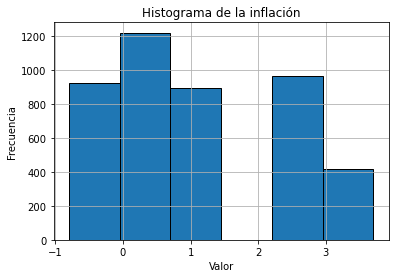

In [50]:
frecuencia, bins, p = plt.hist(df_final["Inflation rate"], bins = 6, edgecolor='black')  # Ajusta el número en 'bins' según cómo quieras los intervalos
plt.title('Histograma de la inflación')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [51]:
frecuencia

array([ 923., 1221.,  893.,    0.,  968.,  419.])

In [52]:
bins

array([-0.8 , -0.05,  0.7 ,  1.45,  2.2 ,  2.95,  3.7 ])

Para el caso de la inflación se tomó como referencia los valores objetivo del banco de la republica de Colombia. Según la junta directiva del banco central del pais la meta de inflación anual se encuentra en un 3% y el rango aceptable se encuentra dentro del +/-1%. Según este orden de ideas, se discretizará esta variable del modelo (_Inflation rate_) de la siguiente forma:

* (-1 , 1) -> Baja (B)
* (1 , 3) -> Media (M)
* (3 , 4) -> Alta (A)

https://www.banrep.gov.co/es/glosario/meta-inflacion#:~:text=En%20Colombia%20la%20meta%20de,encuentra%20en%20el%203%20%25%20anual.

In [53]:
#Se crea la lista con los rangos númericos a discretizar
bins = [-1, 1, 3, 4]
#Se crea la lista con las clases de la nueva variable discretizada
labels = ['B', 'M', 'A'] 

#Se crea una nueva columna discretizdada dentro del dataframe final 
df_final['Inflation rate new'] = pd.cut(df_final['Inflation rate'], bins = bins, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
df_final['Inflation rate new']

C:\Users\jgvm\AppData\Local\Temp\ipykernel_14636\463205152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Inflation rate new'] = pd.cut(df_final['Inflation rate'], bins = bins, labels = labels, right = True,  include_lowest=True)


0       M
1       B
2       M
3       B
4       B
       ..
4419    M
4420    B
4421    B
4422    B
4423    A
Name: Inflation rate new, Length: 4424, dtype: category
Categories (3, object): ['B' < 'M' < 'A']

### 4.1.3 Previous qualification (grade)

In [54]:
df_final["Previous qualification (grade)"].describe()

count    4424.000000
mean      132.613314
std        13.188332
min        95.000000
25%       125.000000
50%       133.100000
75%       140.000000
max       190.000000
Name: Previous qualification (grade), dtype: float64

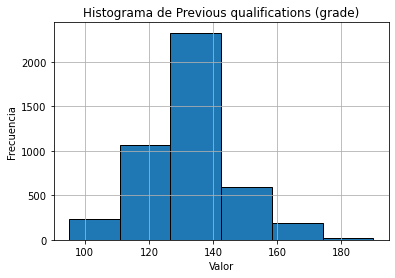

In [55]:
frecuencia, bins, p = plt.hist(df_final["Previous qualification (grade)"], bins = 6, edgecolor='black')  
plt.title('Histograma de Previous qualifications (grade)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [56]:
frecuencia

array([ 237., 1069., 2326.,  588.,  184.,   20.])

In [57]:
bins

array([ 95.        , 110.83333333, 126.66666667, 142.5       ,
       158.33333333, 174.16666667, 190.        ])

El sistema actual de valoración de los estudiantes en Colombia se rige por el decreto 1920 del 2009. En este se estipula 4 categorias en los que se clasifican los estudiantes según sus resultados academicos. A continuación se presentan dichas categorias y su representación cuantitativa:

* (0.0, 2.9) -> Desempeño Bajo
* (3.0, 3.9) -> Desempeño Basico
* (4.0, 4.5) -> Desemepeño Alto
* (4.6, 5.0) -> Desempeño Superior

Según lo anterior, se procederá a clasificar de la misma forma la variable continua _Previous quailification (grade)_ que se encuentra dentro del modelo. Por lo tanto, será necesario ajustar los rangos cualitativos respecto a nuestra variable ya que esta tiene un rango entre 0 a 200 puntos. Según este orden de ideas, la clasificación cualitativa estará representada de la siguiente forma:

* (0.0, 116) -> Desempeño Bajo
* (117, 156) -> Desempeño Basico
* (157, 180) -> Desempeño Alto
* (181, 200) -> Desemepeño Superior


https://www.mineducacion.gov.co/1621/articles-213769_archivo_pdf_evaluacion.pdf

In [58]:
#Se crea la lista con las clases de la nueva variable discretizada
labels = ['Desemp. Bajo', 'Desemp. Basico', 'Desemp. Alto', 'Desemp. Superior']
bins = [0, 116, 156, 180, 200]

#Se crea una nueva columna discretizdada dentro del dataframe final 
df_final['Previous qualification (grade) new'] = pd.cut(df_final['Previous qualification (grade)'], bins = bins, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
df_final['Previous qualification (grade) new']

C:\Users\jgvm\AppData\Local\Temp\ipykernel_14636\3833586287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Previous qualification (grade) new'] = pd.cut(df_final['Previous qualification (grade)'], bins = bins, labels = labels, right = True,  include_lowest=True)


0       Desemp. Basico
1         Desemp. Alto
2       Desemp. Basico
3       Desemp. Basico
4         Desemp. Bajo
             ...      
4419    Desemp. Basico
4420    Desemp. Basico
4421    Desemp. Basico
4422      Desemp. Alto
4423    Desemp. Basico
Name: Previous qualification (grade) new, Length: 4424, dtype: category
Categories (4, object): ['Desemp. Bajo' < 'Desemp. Basico' < 'Desemp. Alto' < 'Desemp. Superior']

### 4.1.3 Curricular units 1st sem (grade)

Para discretizar la variable *Curricular units 1st sem (grade)* inicialmente se revisa la distribución de los datos usando el método describe del objeto df_new.

In [59]:
df_new["Curricular units 1st sem (grade)"].describe()

count    4424.000000
mean       10.640822
std         4.843663
min         0.000000
25%        11.000000
50%        12.285714
75%        13.400000
max        18.875000
Name: Curricular units 1st sem (grade), dtype: float64

Para discretizar las variables se visualizan los datos a través de un histograma y de esta forma establecer junto con los rangos intercuartílicos los niveles de la variable.

<AxesSubplot:xlabel='Curricular units 1st sem (grade)', ylabel='Count'>

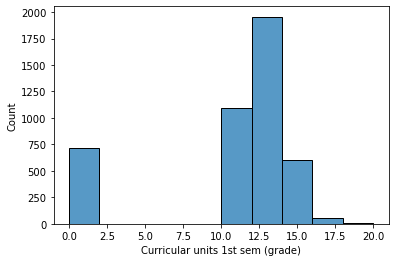

In [60]:
sns.histplot(df_new, x = "Curricular units 1st sem (grade)", binwidth=2)

De acuerdo con el histograma se observa que las notas menores que 10 corresponden a niveles muy bajos de la variable *Curricular units 1st sem (grade)* esto sumado a que solo el 25% de los estudiantes obtienen esta calificación que se concentra en el cero. Por otra parte, los valores entre 10 y 12 constituyen valores bajos dado que extrapolando las las calificaciones de 0 a 5 sería necesacio un 12 para poder aprobar; entre 12 y 14 el desempeño es básico dado que es la mínima nota de aprobación; entre 14 y 16 se considera un desempeño alto y finalmente desempeño superior las notas mayores que 16. Los niveles quedan de la siguiente forma:

* [0, 10) -> Desempeño Bajo
* [10, 12) -> Desempeño Básico
* [12, 14) -> Desempeño Alto
* [14, 20] -> Desemepeño Superior

In [61]:
#Se crea la lista con las clases de la nueva variable discretizada
labels = ['Desemp. Muy Bajo', 'Desemp. Bajo', 'Desemp. Basico', 'Desemp. Alto', 'Desemp. Superior']
bins2 = [0, 10, 12, 14, 16, 20]

#Se crea una nueva columna discretizdada dentro del dataframe final 
df_final['Curricular units 1st sem (grade) new'] = pd.cut(df_final['Curricular units 1st sem (grade)'], bins = bins2, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
df_final['Curricular units 1st sem (grade) new']

C:\Users\jgvm\AppData\Local\Temp\ipykernel_14636\1672754619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Curricular units 1st sem (grade) new'] = pd.cut(df_final['Curricular units 1st sem (grade)'], bins = bins2, labels = labels, right = True,  include_lowest=True)


0       Desemp. Muy Bajo
1         Desemp. Basico
2       Desemp. Muy Bajo
3         Desemp. Basico
4         Desemp. Basico
              ...       
4419      Desemp. Basico
4420        Desemp. Bajo
4421        Desemp. Alto
4422      Desemp. Basico
4423        Desemp. Bajo
Name: Curricular units 1st sem (grade) new, Length: 4424, dtype: category
Categories (5, object): ['Desemp. Muy Bajo' < 'Desemp. Bajo' < 'Desemp. Basico' < 'Desemp. Alto' < 'Desemp. Superior']

## 4.1.4 GDP

Para discretizar la variable GDP se ve la distribución de la variable con la función describe, posteriormente se visualiza la distribución de la variable usando un histograma y se definen los niveles de la variable discretizada.

In [62]:
df_new["GDP"].describe()

count    4424.000000
mean        0.001969
std         2.269935
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: GDP, dtype: float64

<AxesSubplot:xlabel='GDP', ylabel='Count'>

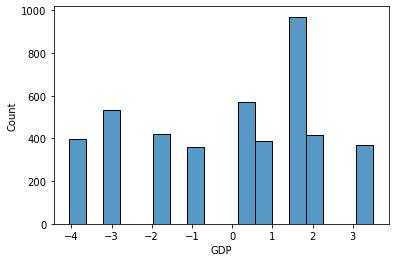

In [63]:
sns.histplot(df_new, x = "GDP")

In [64]:
#df_final.sort_values(by="GDP", ascending=True).head(100)
#df_final.groupby(by=["GDP"]).agg({'GDP':['count']})

#Se crea la lista con las clases de la nueva variable discretizada
labels = ['GDP. Muy Bajo', 'GDP. Bajo', 'GDP. Medio', 'GDP. Alto']
bins3 = [-5, -2, 0, 1.79, 5]

#Se crea una nueva columna discretizdada dentro del dataframe final 
df_final['GDP new'] = pd.cut(df_final['GDP'], bins = bins3, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
df_final['GDP new']

0          GDP. Medio
1          GDP. Medio
2          GDP. Medio
3       GDP. Muy Bajo
4          GDP. Medio
            ...      
4419    GDP. Muy Bajo
4420        GDP. Alto
4421       GDP. Medio
4422    GDP. Muy Bajo
4423        GDP. Bajo
Name: GDP new, Length: 4424, dtype: category
Categories (4, object): ['GDP. Muy Bajo' < 'GDP. Bajo' < 'GDP. Medio' < 'GDP. Alto']

## 4.1.5 Unemployment Rate

In [65]:
df_new["Unemployment rate"].describe()

count    4424.000000
mean       11.566139
std         2.663850
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: Unemployment rate, dtype: float64

<AxesSubplot:xlabel='Unemployment rate', ylabel='Count'>

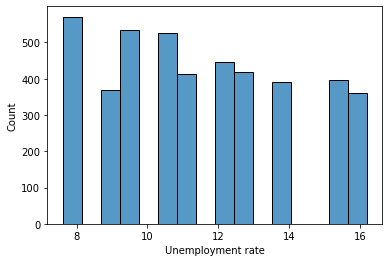

In [66]:
sns.histplot(df_new, x = "Unemployment rate")

In [67]:
#Se crea la lista con las clases de la nueva variable discretizada
labels = ['Unemployment R. Bajo', 'Unemployment R. Medio', 'Unemployment R. Alto', 'Unemployment R. Superior']
bins4 = [0, 9.4, 11.1, 13.9, 17]

#Se crea una nueva columna discretizdada dentro del dataframe final 
df_final['Unemployment rate new'] = pd.cut(df_final['Unemployment rate'], bins = bins4, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
df_final['Unemployment rate new']

#df_final.groupby(by=["Unemployment rate"]).agg({'GDP':['count']})

0          Unemployment R. Medio
1           Unemployment R. Alto
2          Unemployment R. Medio
3           Unemployment R. Bajo
4           Unemployment R. Alto
                  ...           
4419    Unemployment R. Superior
4420       Unemployment R. Medio
4421        Unemployment R. Alto
4422        Unemployment R. Bajo
4423        Unemployment R. Alto
Name: Unemployment rate new, Length: 4424, dtype: category
Categories (4, object): ['Unemployment R. Bajo' < 'Unemployment R. Medio' < 'Unemployment R. Alto' < 'Unemployment R. Superior']

## 4.2 Variables Discretas

### 4.2.1 Course

In [68]:
# Valores unicos 
df_final["Course"].unique()

[171, 9254, 9070, 9773, 8014, ..., 9556, 9147, 9003, 33, 9119]
Length: 17
Categories (17, int64): [33, 171, 8014, 9003, ..., 9670, 9773, 9853, 9991]

In [69]:
# Frecuencia de los valores unicos
df_final["Course"].value_counts()

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

### 4.2.1.1 Reducción de Categorias de la variable Course

Al aplicar la función _unique()_ sobre la columna de la variable _Course_ se logra identificar que existen **17** categorias. Por lo tanto, para reducir la cantidad de niveles se procederá a crear nuevas categorias donde exista alguna relación entre las demas y así reducir el número de niveles para esta variable categorica.

Entonces, al visualizar detalladamente las categorias actuales se logró identificar 5 nuevas categorias en donde se podía reagrupar las categorias actuales. Lo anterior se puede observar de la siguiente forma:

1. Ciencias Exactas (1):
    - Biofuel Production Technologies (33)
    - Informatics Engineering (9119)
    - Management (9147)
    - Management (evening attendance) (9991)
    

2. Diseño (2):
    - Animation and Multimedia Design (171)
    - Communication Design (9070)
    - Advertising and Marketing Management (9670)
    

3. Ciencias Sociales (3):
    - Social Service (evening attendance) (8014)
    - Social Service (9238)
    - Tourism (9254)
    - Journalism and Communication (9773) 
    - Basic Education (9853)
    
    
4. Ciencias Agrarias (4):
    - Agronomy (9003)
    - Equinculture (9130)
    
    
5. Ciencias de la Salud (5):
    - Veterinary Nursing (9085)
    - Nursing (9500)
    - Oral Hygiene (9556)

In [70]:
# Actualización de la nueva columna de Course reducida en categorias
nuevas_categorias = {"Ciencias Exactas":[33,9119,9147,9991], "Diseno":[171,9070,9670], "Ciencias Sociales":[8014,9238,9254,9773,9853], "Ciencias Agrarias":[9003,9130], "Ciencias de la Salud":[9085, 9500,9556]}

df_final['Course new'] = df_final['Course'].copy()

# Itera sobre las llaves y valores del diccionario
for nuevo_valor, lista_valores in nuevas_categorias.items():
    # Usa el método 'replace' para actualizar los valores en la nueva columna
    df_final['Course new'] = df_final['Course new'].replace(lista_valores, nuevo_valor)

# Verifica el resultado
df_final[['Course new','Course']]

,Course new,Course
0,Diseno,171
1,Ciencias Sociales,9254
2,Diseno,9070
3,Ciencias Sociales,9773
4,Ciencias Sociales,8014
...,...,...
4419,Ciencias Sociales,9773
4420,Ciencias Sociales,9773
4421,Ciencias de la Salud,9500
4422,Ciencias Exactas,9147


In [71]:
variables_discretas_final = ['Course new','Daytime/evening attendance\t','Previous qualification (grade) new','Displaced','Tuition fees up to date','Scholarship holder','Curricular units 1st sem (evaluations) new','Curricular units 1st sem (grade) new', 'Unemployment rate new', 'Inflation rate new', 'GDP new','Target']
df_pred = df_final[variables_discretas_final]
df_pred

,Course new,Daytime/evening attendance\t,Previous qualification (grade) new,Displaced,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (evaluations) new,Curricular units 1st sem (grade) new,Unemployment rate new,Inflation rate new,GDP new,Target
0,Diseno,1,Desemp. Basico,1,1,0,MB,Desemp. Muy Bajo,Unemployment R. Medio,M,GDP. Medio,Dropout
1,Ciencias Sociales,1,Desemp. Alto,1,0,0,MB,Desemp. Basico,Unemployment R. Alto,B,GDP. Medio,Graduate
2,Diseno,1,Desemp. Basico,1,0,0,MB,Desemp. Muy Bajo,Unemployment R. Medio,M,GDP. Medio,Dropout
3,Ciencias Sociales,1,Desemp. Basico,1,1,0,B,Desemp. Basico,Unemployment R. Bajo,B,GDP. Muy Bajo,Graduate
4,Ciencias Sociales,0,Desemp. Bajo,0,1,0,B,Desemp. Basico,Unemployment R. Alto,B,GDP. Medio,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Ciencias Sociales,1,Desemp. Basico,0,1,0,MB,Desemp. Basico,Unemployment R. Superior,M,GDP. Muy Bajo,Graduate
4420,Ciencias Sociales,1,Desemp. Basico,1,0,0,MB,Desemp. Bajo,Unemployment R. Medio,B,GDP. Alto,Dropout
4421,Ciencias de la Salud,1,Desemp. Basico,1,1,1,B,Desemp. Alto,Unemployment R. Alto,B,GDP. Medio,Dropout
4422,Ciencias Exactas,1,Desemp. Alto,1,1,1,MB,Desemp. Basico,Unemployment R. Bajo,B,GDP. Muy Bajo,Graduate


### Renombrando las columnas

In [72]:
df_pred = df_pred.rename(columns={'Course new':'course','Daytime/evening attendance\t':'daytime/evening attendance','Previous qualification (grade) new':'previous qualification (grade)','Displaced':'displaced','Tuition fees up to date':'tuition fees up to date','Scholarship holder':'scholarship holder','Curricular units 1st sem (evaluations) new':'curricular units 1st sem (evaluations)','Curricular units 1st sem (grade) new':'curricular units 1st sem (grade)', 'Unemployment rate new':'unemployment rate', 'Inflation rate new':'inflation rate','GDP new':'gdp','Target':'target'})
df_pred

,course,daytime/evening attendance,previous qualification (grade),displaced,tuition fees up to date,scholarship holder,curricular units 1st sem (evaluations),curricular units 1st sem (grade),unemployment rate,inflation rate,gdp,target
0,Diseno,1,Desemp. Basico,1,1,0,MB,Desemp. Muy Bajo,Unemployment R. Medio,M,GDP. Medio,Dropout
1,Ciencias Sociales,1,Desemp. Alto,1,0,0,MB,Desemp. Basico,Unemployment R. Alto,B,GDP. Medio,Graduate
2,Diseno,1,Desemp. Basico,1,0,0,MB,Desemp. Muy Bajo,Unemployment R. Medio,M,GDP. Medio,Dropout
3,Ciencias Sociales,1,Desemp. Basico,1,1,0,B,Desemp. Basico,Unemployment R. Bajo,B,GDP. Muy Bajo,Graduate
4,Ciencias Sociales,0,Desemp. Bajo,0,1,0,B,Desemp. Basico,Unemployment R. Alto,B,GDP. Medio,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Ciencias Sociales,1,Desemp. Basico,0,1,0,MB,Desemp. Basico,Unemployment R. Superior,M,GDP. Muy Bajo,Graduate
4420,Ciencias Sociales,1,Desemp. Basico,1,0,0,MB,Desemp. Bajo,Unemployment R. Medio,B,GDP. Alto,Dropout
4421,Ciencias de la Salud,1,Desemp. Basico,1,1,1,B,Desemp. Alto,Unemployment R. Alto,B,GDP. Medio,Dropout
4422,Ciencias Exactas,1,Desemp. Alto,1,1,1,MB,Desemp. Basico,Unemployment R. Bajo,B,GDP. Muy Bajo,Graduate


In [73]:
df_pred.to_csv('data_discreta.csv', sep = ";")

In [90]:
X = sm.add_constant(df[['Age at enrollment']])
y = df['Target']
model = sm.MNLogit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.988555
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                 4424
Model:                        MNLogit   Df Residuals:                     4420
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                 0.03069
Time:                        16:12:45   Log-Likelihood:                -4373.4
converged:                       True   LL-Null:                       -4511.8
Covariance Type:            nonrobust   LLR p-value:                 7.342e-61
  Target=Enrolled       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7988      0.152      5.244      0.000       0.500       1.097
Age at e

# Correlación entre Target y Course

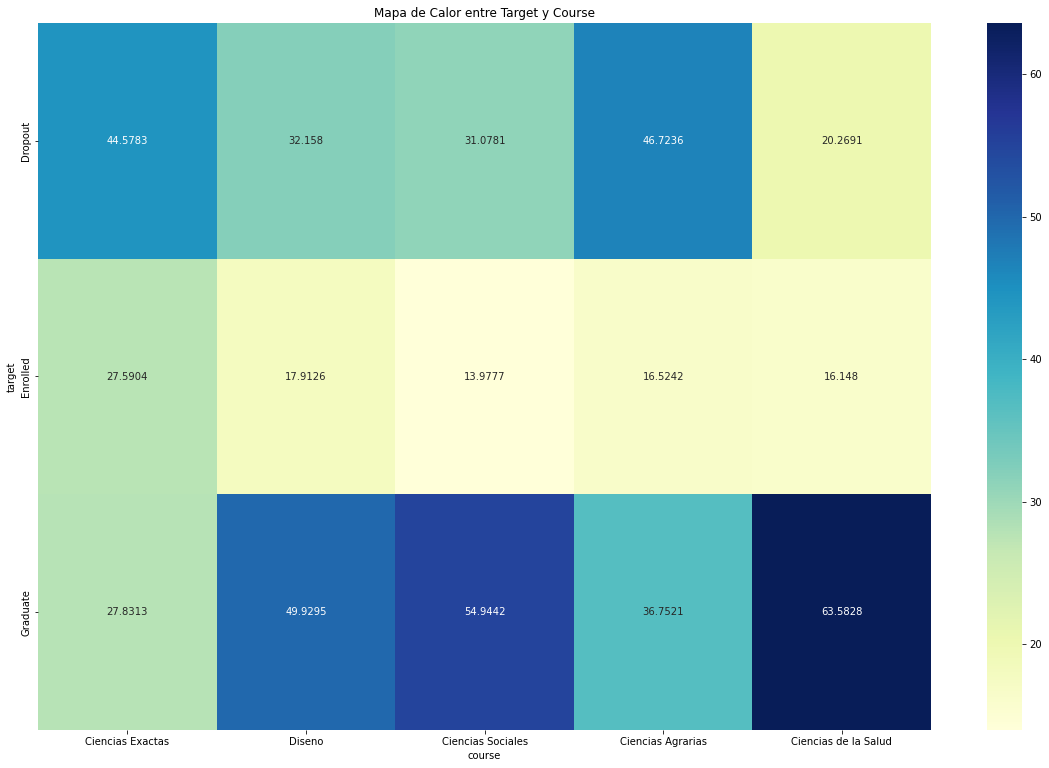

In [97]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['course'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['course'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y Course')
plt.show()

In [101]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['course'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.1895050085105246


# Correlacion entre Target y daytime/evening attendance

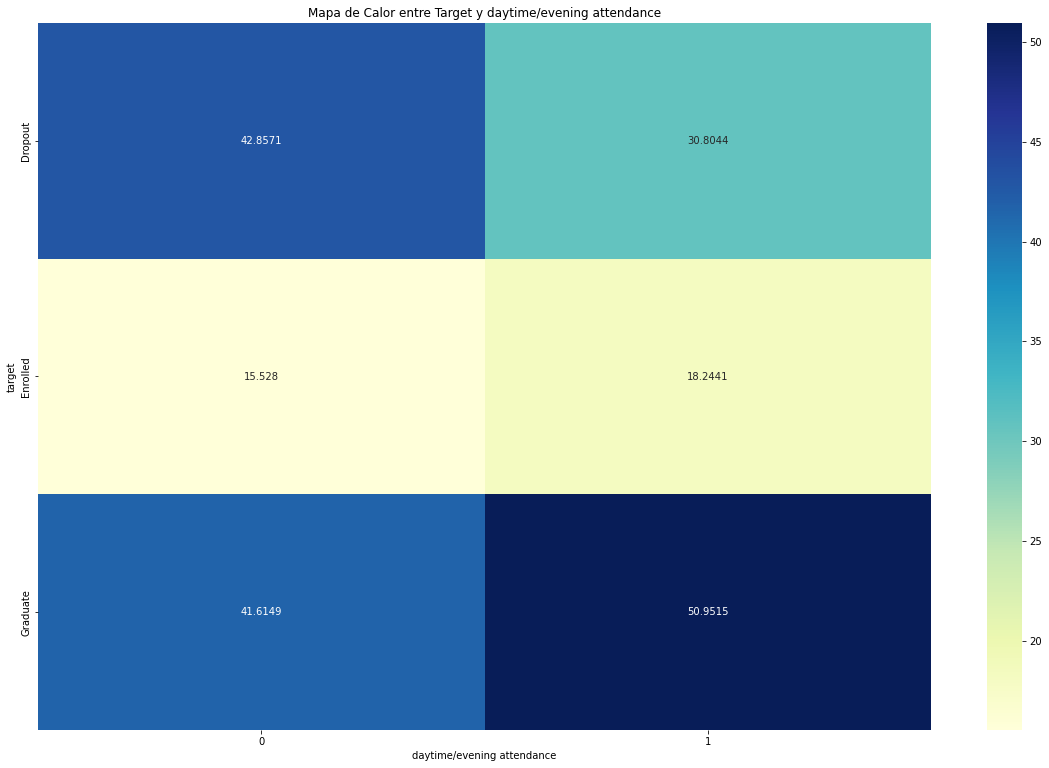

In [103]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['daytime/evening attendance'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['daytime/evening attendance'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y daytime/evening attendance')
plt.show()

In [105]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['daytime/evening attendance'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.0806000570629202


# Correlacion entre Target y previous qualification (grade)

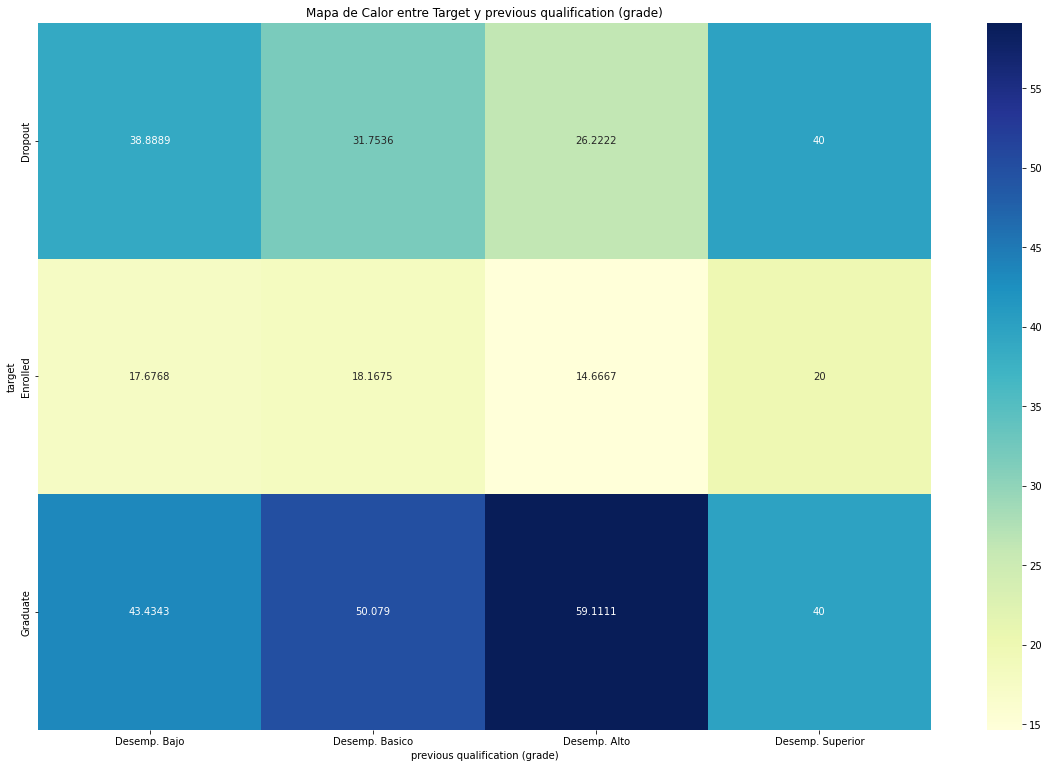

In [106]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['previous qualification (grade)'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['previous qualification (grade)'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y previous qualification (grade)')
plt.show()

In [108]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['previous qualification (grade)'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.043936947353316505


# Correlacion entre Target y displaced

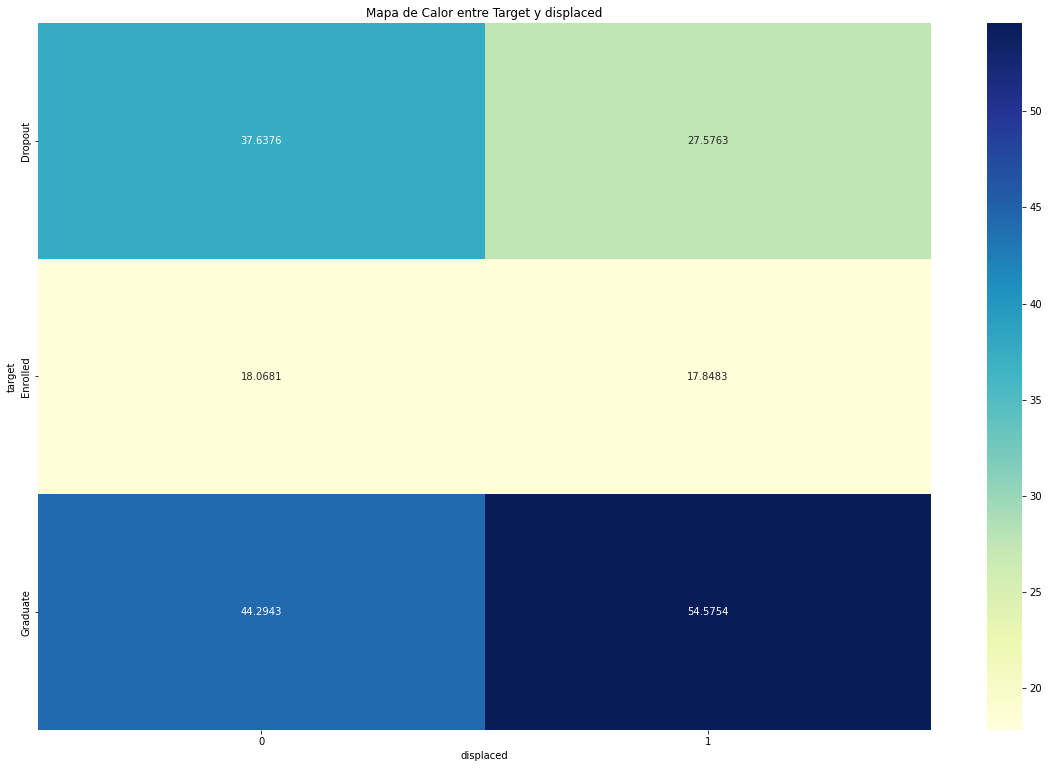

In [110]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['displaced'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['displaced'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y displaced')
plt.show()

In [109]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['displaced'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.11425736639872304


# Correlacion entre Target y tuition fees up to date

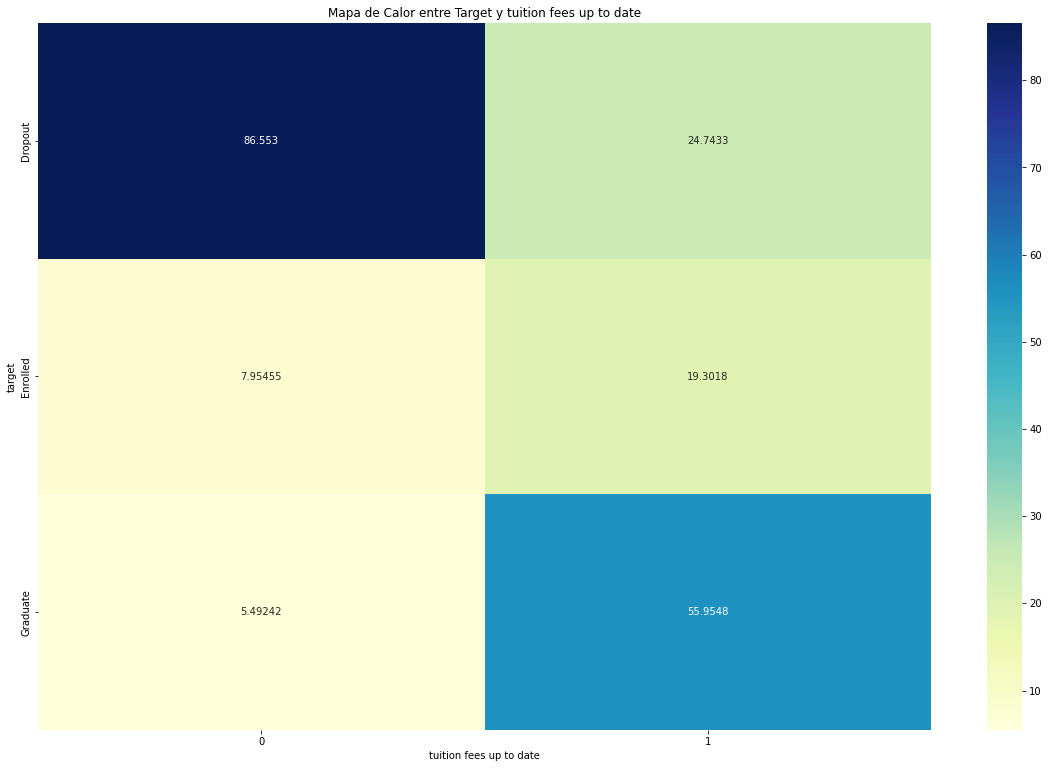

In [124]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['tuition fees up to date'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['tuition fees up to date'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y tuition fees up to date')
plt.show()

In [112]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['displaced'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.4314576214556677


# Correlacion entre Target y scholarship holder

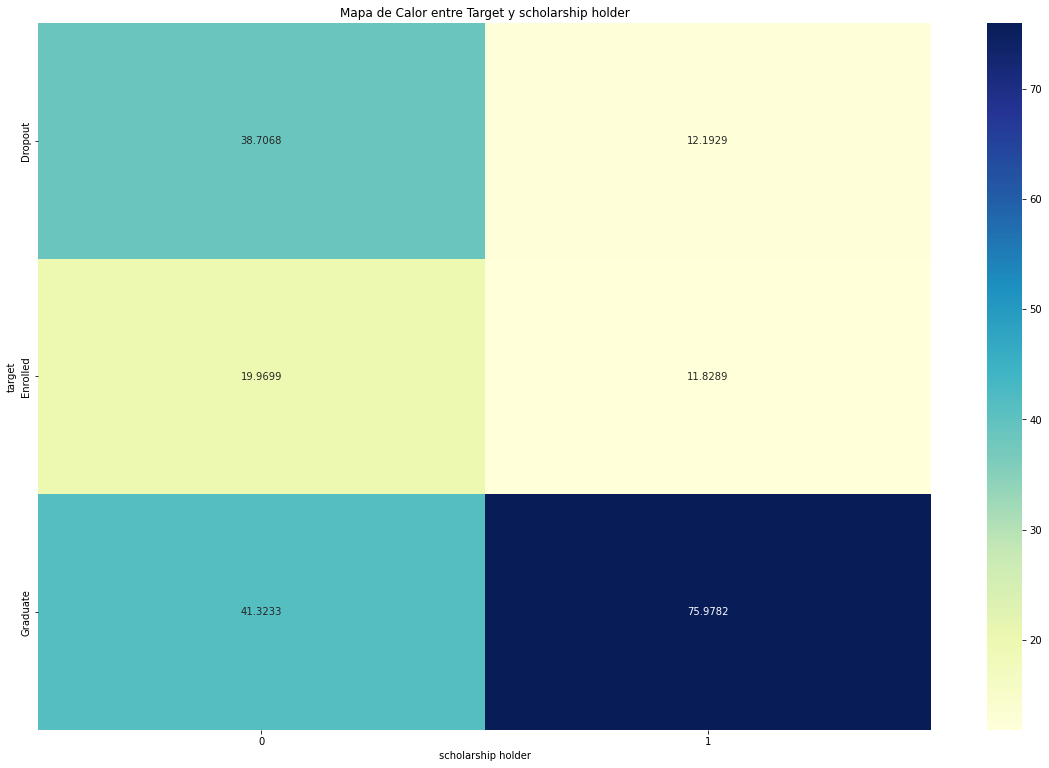

In [113]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['scholarship holder'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['scholarship holder'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y scholarship holder')
plt.show()

In [114]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['scholarship holder'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.30440670047871277


# Correlacion entre Target y curricular units 1st sem (evaluations)

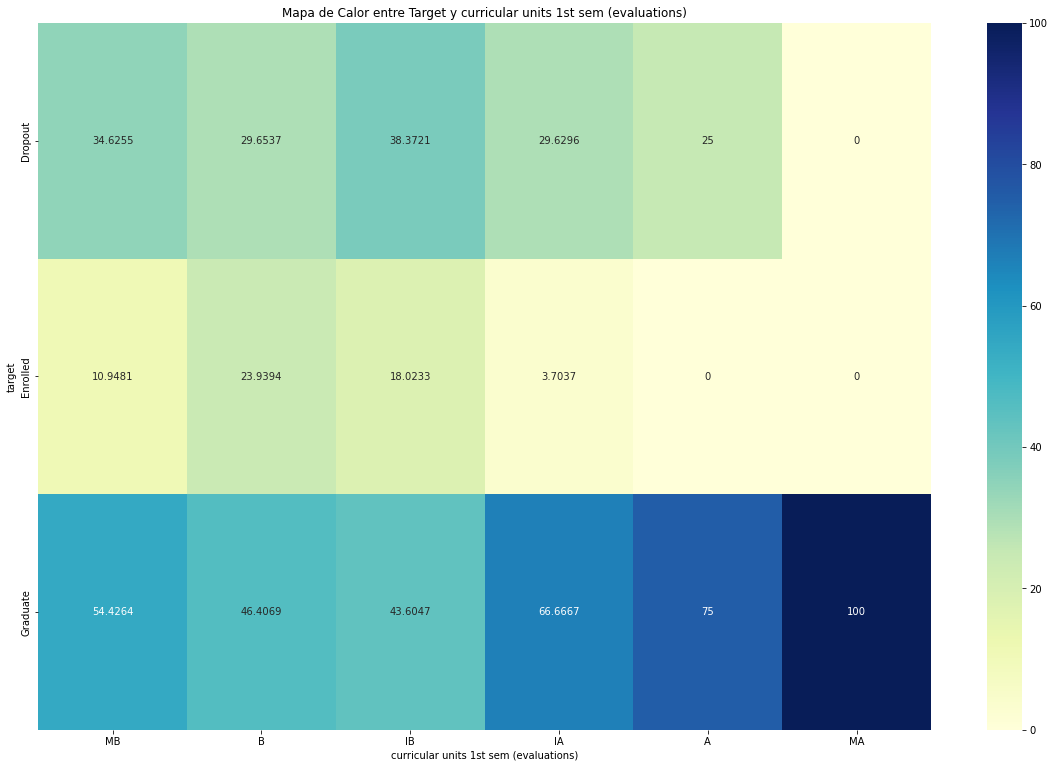

In [116]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['curricular units 1st sem (evaluations)'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['curricular units 1st sem (evaluations)'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y curricular units 1st sem (evaluations)')
plt.show()

In [117]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['curricular units 1st sem (evaluations)'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.12180704590330936


# Correlacion entre Target y curricular units 1st sem (grade)

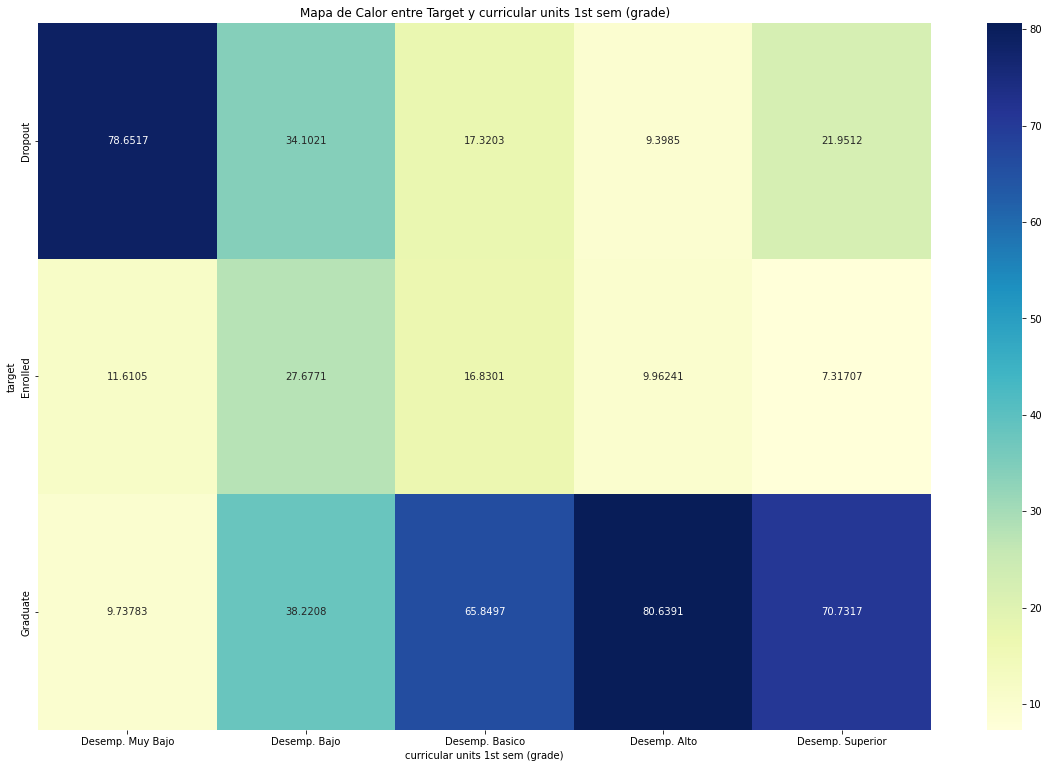

In [118]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['curricular units 1st sem (grade)'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['curricular units 1st sem (grade)'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y curricular units 1st sem (grade)')
plt.show()

In [119]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['curricular units 1st sem (grade)'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.3903020528319753


# Correlacion entre Target y unemployment rate

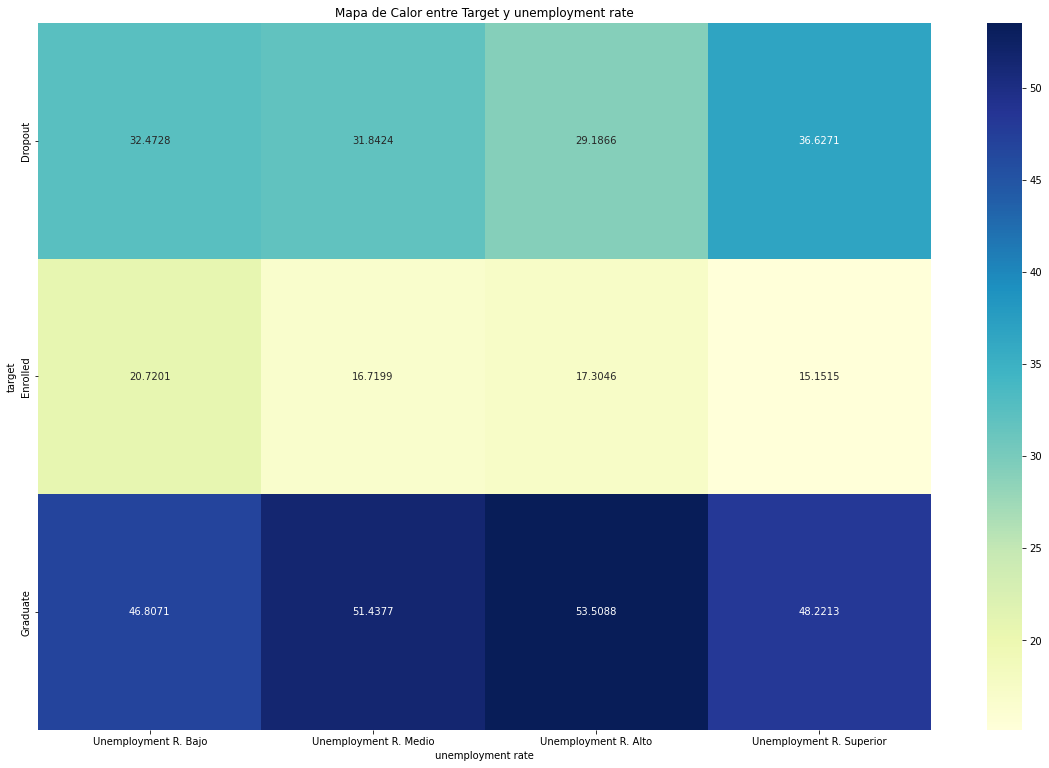

In [121]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['unemployment rate'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['unemployment rate'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y unemployment rate')
plt.show()

In [122]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['unemployment rate'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.05409355102671472


# Correlacion entre Target y inflation rate

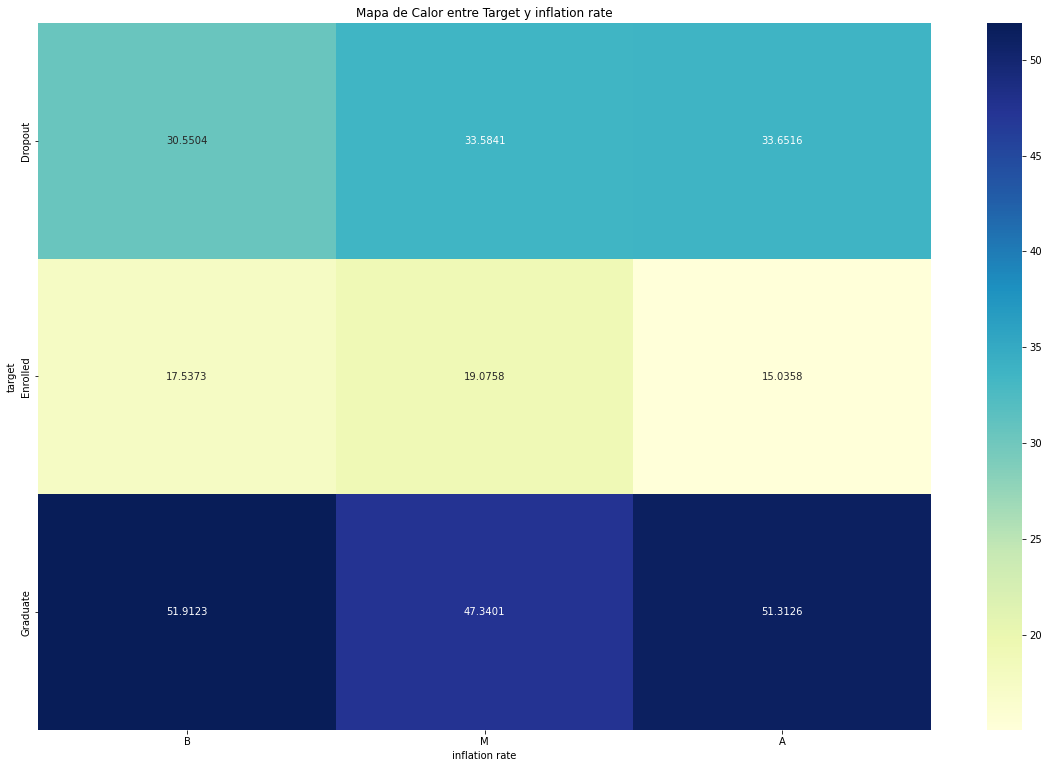

In [125]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['inflation rate'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['inflation rate'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y inflation rate')
plt.show()

In [126]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['inflation rate'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.03532376233874731


# Correlacion entre Target y gdp

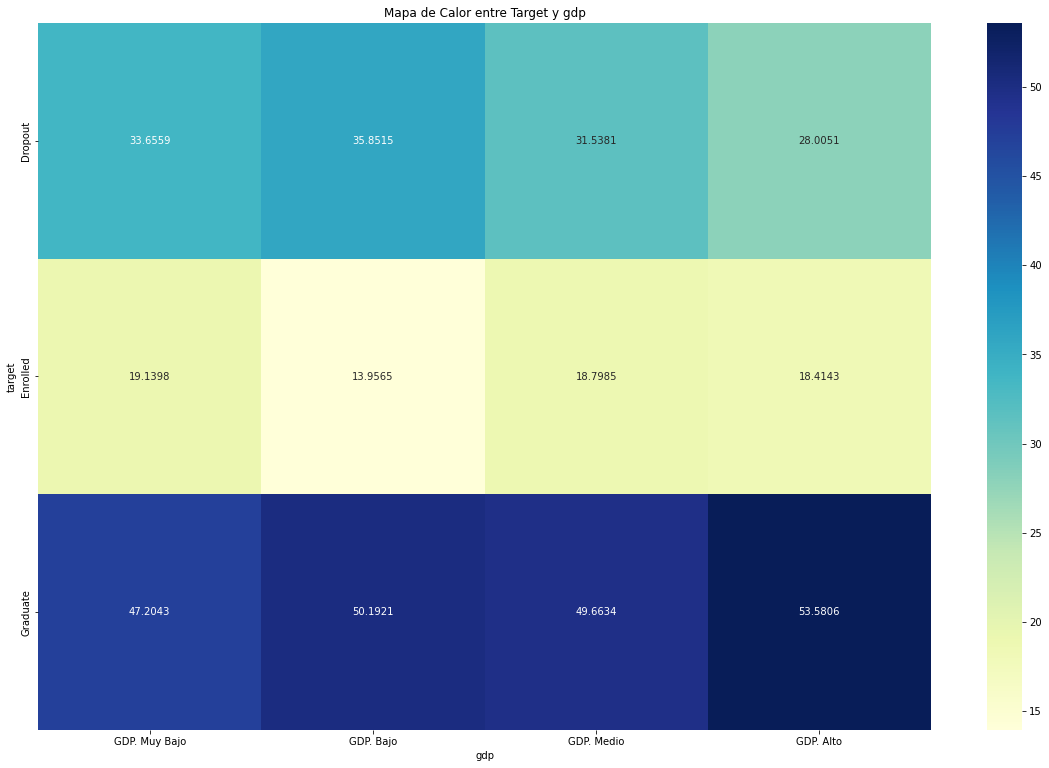

In [127]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['gdp'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_pred['target'], df_pred['gdp'], normalize='columns') * 100
                                                 
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre Target y gdp')
plt.show()

In [130]:
# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_pred['target'], df_pred['gdp'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.04807056636685258


In [149]:
d = {}

columns = ['course','daytime/evening attendance','previous qualification (grade)','displaced','tuition fees up to date','scholarship holder','curricular units 1st sem (evaluations)','curricular units 1st sem (grade)', 'unemployment rate', 'inflation rate', 'gdp']

for i in columns:
    # Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
    contingency_table = pd.crosstab(df_pred['target'], df_pred[i])
    # Calcula el estadístico chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    # Calcula la V de Cramér
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
    cramers_v = np.sqrt(chi2 / (n * min_dim))

    d[i] = cramers_v
    
d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

for i in d:
    print(i,": ", d[i] ,"\n")

tuition fees up to date :  0.4314576214556677 

curricular units 1st sem (grade) :  0.3903020528319753 

scholarship holder :  0.30440670047871277 

course :  0.1895050085105246 

curricular units 1st sem (evaluations) :  0.12180704590330936 

displaced :  0.11425736639872304 

daytime/evening attendance :  0.0806000570629202 

unemployment rate :  0.05409355102671472 

gdp :  0.04807056636685258 

previous qualification (grade) :  0.043936947353316505 

inflation rate :  0.03532376233874731 

